In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
data = pd.read_csv('CC GENERAL.csv')
data.head()


In [ ]:
data.info()

In [ ]:
data.isna().sum()

In [4]:
data.fillna('no-null', inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
data.drop(['CUST_ID'],axis=1,inplace=True)

In [5]:
data_numeric = pd.get_dummies(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)
scaled_data_df = pd.DataFrame(scaled_data, columns=data_numeric.columns)


In [ ]:
def apply_kmeans_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    data['Cluster'] = cluster_labels
    cluster_centers = kmeans.cluster_centers_
    cluster_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
    return cluster_df, data
def analyze_clusters(data):
    print("\nCluster Counts:")
    print(data['Cluster'].value_counts())
num_clusters = 4
cluster_centers, clustered_data = apply_kmeans_clustering(scaled_data_df, num_clusters)
analyze_clusters(clustered_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


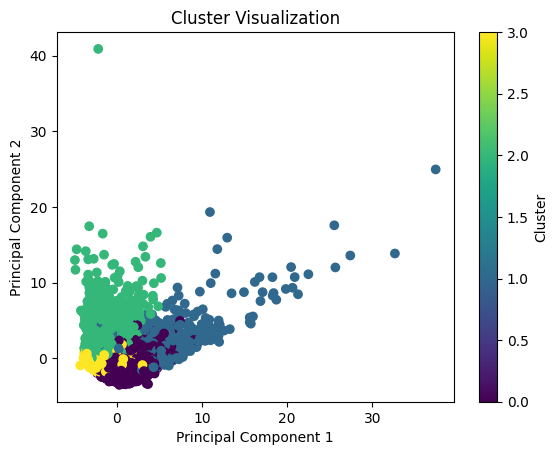

In [17]:
def visualize_clusters(data, cluster_labels):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('Cluster Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
visualize_clusters(scaled_data_df, clustered_data['Cluster'])